In [1]:
from pandas import DataFrame, read_csv
import pandas as pd #this is how I usually import pandas
import matplotlib.pyplot as plt #for plot
import nltk
#read_csv?
Location = r'../twitter_data/train2017.tsv'
df = pd.read_csv(Location,delimiter = '\t',nrows=50,names=['id','id2','tag','text'])


In [2]:
import sklearn
from sklearn.manifold import TSNE


def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
               textcoords='offset points',
                         ha='right',
                         va='bottom')
    plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


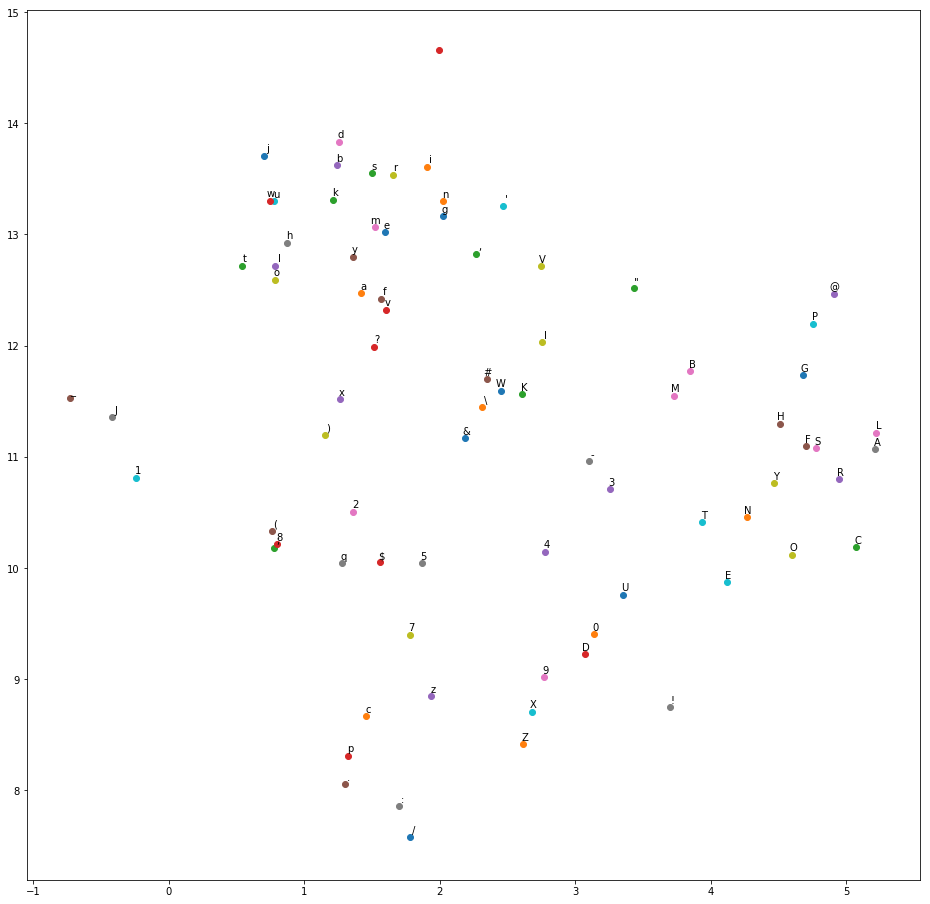

In [3]:
dirty_list = df.text.tolist()
import gensim


dirty_model = gensim.models.Word2Vec(
            dirty_list,
            size=50, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

dirty_model.train(dirty_list, total_examples= len(dirty_list), epochs=20)
tsne_plot(dirty_model)

In [4]:
tweet0 = df.text[0]
for word in tweet0:
    print(dirty_model[word])
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[ 0.3329113   0.11981771 -0.21422406 -0.24652798 -0.11751851 -0.09775794
 -0.15187871  0.00248379 -0.27493492  0.31589043 -0.5803643   0.5774046
  0.3638525   0.7133389  -0.9635827   0.23846245  0.40879428  0.30701613
  0.3524933   0.9212201  -0.26737323  0.6456897  -0.0396293  -0.17764515
 -0.19667253 -0.25581715  0.19305868 -0.17967792  0.21165138  1.1050674
  0.11255769  0.24315636  0.19659074 -0.7366386  -0.13980348 -0.07359484
  0.72925967  0.11114544  0.1599499   0.13892502  1.1035733  -0.28189537
 -1.0537657  -1.3760267  -0.29910314 -0.5447154  -1.3341807   0.7115334
  0.01606527 -0.13875376]
[ 0.0460312   0.00140854 -0.3268995  -0.1902383  -0.18732168 -0.03089111
 -0.20159772  0.00678217 -0.440447    0.3143366  -0.5403991   0.84057593
  0.27811038  0.7105687  -1.0323638   0.20860311  0.4100503   0.36204806
  0.38067794  0.9048089  -0.16020688  0.7855763  -0.00558451 -0.37432784
  0.04865658 -0.328449    0.36961356 -0.27901524 -0.01943685  1.0836635
  0.05718978  0.34027004  0.0

  0.09032457 -0.02219058]
[-0.06532393 -0.15203312 -0.31803268 -0.116942   -0.26454633 -0.09339012
 -0.29272628  0.08291773 -0.54376906  0.27892196 -0.45372343  0.88645744
  0.3329402   0.7002701  -1.0199183   0.26353258  0.4019047   0.33408213
  0.304418    0.85228467 -0.12098997  0.7885965   0.03153907 -0.38125065
  0.12679066 -0.28113994  0.39234865 -0.24070519 -0.15534061  1.1155105
  0.12890719  0.37287045  0.00970418 -0.84729487  0.18684965 -0.23471153
  0.73763174  0.1809589   0.28281108  0.20754598  1.2396504  -0.43864647
 -0.92207676 -1.418542   -0.6365492  -0.6584866  -1.3086165   0.7043211
  0.14666034  0.13397357]
[-0.16506177 -0.35561383 -0.31373885 -0.13602042 -0.16132952  0.02572041
 -0.45046818  0.11687689 -0.6596028   0.35470614 -0.3892182   1.0624218
  0.37281525  0.67571443 -1.0457983   0.10759093  0.5174674   0.47579825
  0.20630464  0.7581061  -0.1272279   0.83218384 -0.00597675 -0.39688075
  0.33346987 -0.44232163  0.5115009  -0.32171163 -0.2836051   1.1724374
 -0